<a href="https://colab.research.google.com/github/Toxxi-frank/Deeplearning/blob/main/Traffic_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
!pip install tensorflow-gpu==2.0.rc
# do version đã đáp ứng nên không cần download nữa

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pwd
# địa chỉ hiện tại

'/content'

In [ ]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
pwd
# địa chỉ hiện tại của thư mục

'/content/drive/My Drive'

In [ ]:
ls
# list các folder

'Bài nói '/          Dog_Cat/         MNIST_training.ipynb
'Colab Notebooks'/   Dog_Cat.ipynb    Python_rat_la_co_ban_-_Vo_Duy_Tuan.pdf
 Diabetes.ipynb     'file đề'/        Sicher_B1_KB.pdf
 DL1.ipynb           howtothink.pdf   Traffic_Sign.ipynb


In [ ]:
!pip install wget
# thư viện dùng để download

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=60da660077a2f153310b4dae7b9942801e1e375fe74a23f0b2675ef0f10bfe12
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget
# import thư viện dùng để download

In [ ]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [ ]:
wget.download(link)

'traffic-signs-data.zip'

In [ ]:
data = "./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

In [ ]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
import pickle
# thư viện đọc file .p

In [ ]:
with open(train_link, mode = 'rb') as f:
  train = pickle.load(f)
# open, đọc các file

In [ ]:
with open(valid_link, mode = 'rb') as f:
  valid = pickle.load(f)
# open, đọc các file

In [ ]:
with open(test_link, mode = 'rb') as f:
  test = pickle.load(f)
# open, đọc các file

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
trainX = train['features']
trainY = train['labels']

In [ ]:
trainX.shape
# số ảnh, size ảnh và channel

(34799, 32, 32, 3)

In [ ]:
trainX[0].shape
# size, channel (number of)

(32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt
# thư viện để hiện ra ảnh

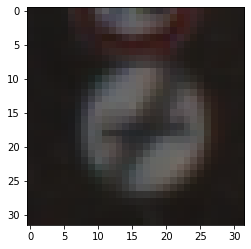

In [ ]:
plt.imshow(trainX[0])

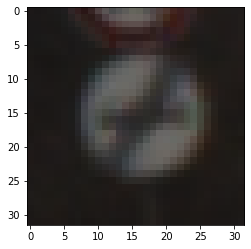

In [ ]:
plt.imshow(trainX[1])

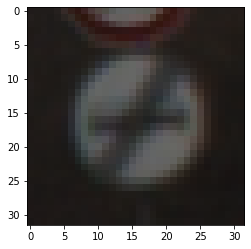

In [ ]:
plt.imshow(trainX[10])

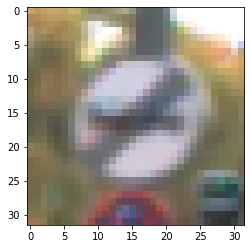

In [ ]:
plt.imshow(trainX[100])

In [ ]:
trainY[100]
# nhãn của bức ảnh or name of labels

41

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [ ]:
classNames[trainY[100]]

'End of no passing'

In [ ]:
from sklearn.utils import shuffle
# thư viện để xáo trộn các ảnh
# do các ảnh gần nhau giống nhau làm mất tính tổng quát

In [ ]:
trainX, trainY = shuffle(trainX, trainY)
# xáo trộn các ảnh, data

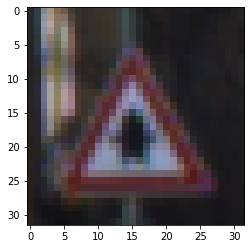

In [ ]:
plt.imshow(trainX[0])
# thấy ảnh đã được xáo trộn, khác so với ảnh ở trên

In [ ]:
classNames[trainY[0]]
# label of photo 

'Right-of-way at the next intersection'

In [ ]:
validX = valid['features']
validY = valid['labels']
# lấy ra bộ data validation

In [ ]:
testX = test['features']
testY = test['labels']
# lấy ra bộ data test

In [ ]:
trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0
# chuyển xuống các giá trị còn thuộc [0,1]
# để sự ảnh hưởng giữa các data point tương đồng nhau hơn
# nếu so 1, 100 thì sự khác nhau quá lớn

In [ ]:
trainX[0]

array([[[0.14901961, 0.16078431, 0.18431373],
        [0.19215686, 0.25098039, 0.2745098 ],
        [0.50196078, 0.53333333, 0.52941176],
        ...,
        [0.11372549, 0.10980392, 0.11372549],
        [0.12941176, 0.12156863, 0.12941176],
        [0.1372549 , 0.13333333, 0.14117647]],

       [[0.15686275, 0.16078431, 0.18431373],
        [0.19607843, 0.24313725, 0.27843137],
        [0.55686275, 0.58039216, 0.6       ],
        ...,
        [0.1254902 , 0.11372549, 0.12156863],
        [0.1372549 , 0.1254902 , 0.1372549 ],
        [0.14509804, 0.1372549 , 0.14509804]],

       [[0.16078431, 0.15686275, 0.17254902],
        [0.18823529, 0.23529412, 0.2745098 ],
        [0.57647059, 0.6       , 0.65882353],
        ...,
        [0.14117647, 0.12156863, 0.1254902 ],
        [0.14117647, 0.1254902 , 0.12941176],
        [0.1372549 , 0.12156863, 0.1254902 ]],

       ...,

       [[0.14901961, 0.12156863, 0.08235294],
        [0.09803922, 0.09019608, 0.09411765],
        [0.07843137, 0

In [ ]:
from sklearn.preprocessing import LabelBinarizer 
# chuẩn hóa  thành one-hot

In [ ]:
lb = LabelBinarizer()

In [ ]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)
# chuẩn hóa

In [ ]:
valid['labels']

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [ ]:
valid['labels'][10]

41

In [ ]:
validY[0]
# kiểm tra xem được chưa? 
# như đã thấy là số 41

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from keras.models import Model, Sequential
from keras.layers import BatchNormalization, AveragePooling2D, MaxPooling2D, Conv2D, Activation
from keras.layers import Dropout, Flatten, Input, Dense, concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
# import các thư viện để xây dựng mạng

In [ ]:
model = Sequential()

In [ ]:
width =32 
height = 32
classes = 43
# định nghĩa size và số labels

In [ ]:
shape = (width, height, 3)

Áp dụng VGG16-model
Giảm kích thước và tăng số channel

In [ ]:
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = shape))
# padding = same dùng để giữ lại kích cỡ ảnh
# bắt đầu bước feature map

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())
# chuẩn hóa data

In [ ]:
model.add(Conv2D(32,(3,3), padding = 'same'))

In [ ]:
model.add(Activation('relu'))
# hàm này không dùng để học

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Conv2D(64, (3,3), padding = 'same'))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())
# duỗi ảnh ra thành còn 1 chiều do đầu vào phải là vector
# bắt đầu bước phân loại


In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation('relu'))
# do dùng FC nên yêu cầu hàm activation sau hàm dense

In [ ]:
model.add(BatchNormalization())
# chuẩn hóa lại data

In [ ]:
model.add(Dense(classes))
# dense thành số các labels

In [ ]:
model.add(Activation('softmax'))
# xác suất để ra được lớp nào lớn nhất

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
# tạo thêm các ảnh mới bằng cách thay đổi độ, phóng to-nhỏ, đi lên-xuống, sang trái-phải, cho lật ảnh

In [ ]:
learning_rate = 0.01
# assign learning rate

In [ ]:
epochs = 10
batch_size = 64
#epoch là
#batch_size là 

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)
#dùng stochastic gradient descent - thuận toán tối ưu hóa loss-func
#pass learning_rate, momentum 

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
543/543 [==============================] - 60s 54ms/step - loss: 2.6158 - accuracy: 0.2965 - val_loss: 2.4012 - val_accuracy: 0.3683
Epoch 2/10
543/543 [==============================] - 29s 54ms/step - loss: 1.0142 - accuracy: 0.6706 - val_loss: 1.4245 - val_accuracy: 0.5930
Epoch 3/10
543/543 [==============================] - 29s 53ms/step - loss: 0.5277 - accuracy: 0.8277 - val_loss: 1.5889 - val_accuracy: 0.5721
Epoch 4/10
543/543 [==============================] - 28s 52ms/step - loss: 0.3387 - accuracy: 0.8870 - val_loss: 1.0597 - val_accuracy: 0.7102
Epoch 5/10
543/543 [==============================] - 28s 51ms/step - loss: 0.2451 - accuracy: 0.9206 - val_loss: 0.8860 - val_accuracy: 0.7771
Epoch 6/10
543/543 [==============================] - 28s 52ms/step - loss: 0.1815 - accuracy: 0.9419 - val_loss: 0.9542 - val_accuracy: 0.7719
Epoch 7/10
543/543 [==============================] - 28s 52ms/step - loss: 0.1427 - accuracy: 0.9534 - val_loss: 0.9606 - val_accuracy:

In [ ]:
model.save("traffic_model.h5")
#save model đã train
#h5 là định dạng của keras

In [ ]:
saved_model = tf.keras.models.load_model("traffic_model.h5")
# lấy model đã train ra
# khi ta đã train nhưng chưa dùng luôn thì để lấy ra ta cần load lại

In [ ]:
result = saved_model.predict(testX[100:101])
# try with different values

In [ ]:
result1 = saved_model.predict(testX[8:9])

In [ ]:
result2 = saved_model.predict(testX[30:31])

In [ ]:
result3 = saved_model.predict(testX[80:81])

In [ ]:
result
# đầu ra của softmax, các xác suất dự đoán ra

array([[1.46155255e-02, 9.85280573e-01, 5.03872652e-05, 3.38933290e-08,
        1.72989003e-05, 1.41710120e-06, 5.54403679e-09, 8.69546657e-09,
        2.17832257e-05, 5.48861978e-09, 1.63075065e-09, 1.28500615e-08,
        7.07611250e-08, 3.91255881e-08, 4.40551560e-08, 7.56844976e-10,
        6.92161173e-09, 8.92410451e-11, 2.41425482e-07, 7.80719120e-07,
        5.45486898e-07, 1.33363045e-07, 1.98826076e-08, 1.06940263e-06,
        3.54797010e-07, 1.26600185e-07, 3.20342792e-08, 7.29045325e-07,
        8.63169873e-07, 4.92897501e-09, 1.44346965e-10, 3.70553757e-08,
        6.22784100e-08, 1.89838730e-07, 1.69780290e-09, 2.65060464e-07,
        1.13001903e-07, 6.38685208e-07, 2.16398280e-06, 4.05252763e-07,
        3.54839153e-06, 3.67047022e-07, 2.44446916e-08]], dtype=float32)

In [ ]:
result1

array([[4.65736419e-01, 3.54581231e-09, 2.90668177e-05, 4.00126732e-09,
        7.34397609e-09, 4.26473256e-13, 1.02382138e-08, 6.71323830e-11,
        3.92052334e-06, 2.72158474e-07, 9.54596818e-11, 6.37019753e-07,
        9.94141828e-06, 8.03284138e-07, 6.83431551e-07, 7.95428653e-12,
        7.98890909e-08, 2.70987948e-06, 3.52189766e-09, 3.98656214e-03,
        1.56666283e-04, 1.18974414e-04, 1.06423246e-02, 1.42680213e-03,
        3.65734013e-04, 3.26571494e-01, 1.31134730e-04, 4.39697271e-03,
        2.30028206e-07, 1.36083458e-03, 2.56931045e-08, 1.85009971e-01,
        2.53649208e-08, 1.05101128e-08, 4.01422201e-10, 1.10626083e-07,
        9.59072155e-10, 1.21104520e-07, 2.09844256e-06, 7.47672118e-07,
        4.42096898e-05, 2.90729417e-07, 1.46670132e-07]], dtype=float32)

In [ ]:
result2

array([[4.61893791e-07, 5.39373793e-02, 1.62608342e-06, 5.85182670e-06,
        3.94456516e-12, 9.36795235e-01, 4.22161001e-10, 2.73291251e-10,
        2.96144390e-06, 3.21401084e-09, 4.69941100e-12, 3.01988821e-13,
        1.96896588e-09, 7.56589860e-11, 3.92569488e-09, 8.10375239e-11,
        1.12775933e-09, 4.08038325e-11, 7.14279551e-08, 1.34791787e-11,
        2.72919298e-10, 1.33813467e-08, 2.90495343e-08, 3.24478719e-07,
        7.40087316e-08, 1.29369770e-09, 9.03537566e-14, 7.58291094e-07,
        1.53315450e-05, 9.23914183e-03, 5.99667052e-11, 5.55166082e-07,
        4.94775644e-11, 7.08743553e-09, 1.24651097e-11, 1.17906716e-07,
        1.18907018e-08, 2.59374229e-08, 2.02378025e-08, 1.12598706e-11,
        3.38826993e-08, 8.57465195e-13, 1.51889569e-12]], dtype=float32)

In [ ]:
result3 

array([[2.8805905e-08, 2.0036996e-10, 1.2636007e-08, 6.8394540e-10,
        1.5514000e-12, 1.0318811e-09, 8.5067908e-10, 6.0621979e-09,
        2.9512252e-08, 5.4717488e-09, 7.6728829e-10, 1.3674429e-05,
        5.4431720e-10, 1.9492756e-12, 2.9354012e-11, 4.0618165e-13,
        1.4054498e-06, 1.6427517e-08, 7.1462142e-10, 4.2892992e-05,
        2.8408345e-05, 9.9964976e-01, 6.8705532e-08, 5.7475278e-05,
        4.6084542e-10, 5.5525072e-07, 1.7135521e-07, 3.3113696e-07,
        1.9520628e-06, 1.5770251e-08, 2.4784852e-06, 2.0050726e-04,
        8.0943852e-10, 3.4774628e-10, 3.3289489e-11, 4.5650938e-11,
        2.6231035e-11, 3.3688369e-08, 3.3015723e-09, 1.9192503e-07,
        3.8542272e-09, 4.5595647e-09, 1.9246478e-09]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
final = np.argmax(result)

In [ ]:
final1 = np.argmax(result1)

In [ ]:
final2 = np.argmax(result2)

In [ ]:
final3 = np.argmax(result3)

In [ ]:
final = classNames[final]

In [ ]:
final1 = classNames[final1]

In [ ]:
final2 = classNames[final2]

In [ ]:
final3 = classNames[final3]

In [ ]:
final

'Speed limit (30km/h)'

In [ ]:
final1

'Speed limit (20km/h)'

In [ ]:
final2

'Speed limit (80km/h)'

In [ ]:
final3

'Double curve'

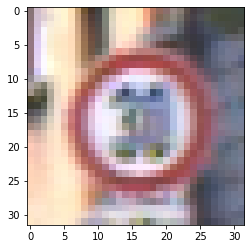

In [ ]:
plt.imshow(test['features'][100])
# test bằng cách xem ảnh

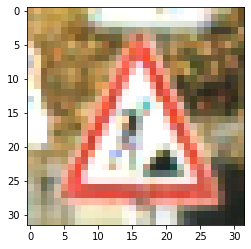

In [ ]:
plt.imshow(test['features'][8])

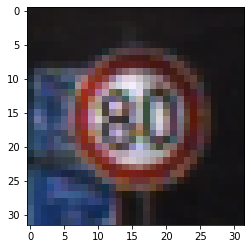

In [ ]:
plt.imshow(test['features'][30])

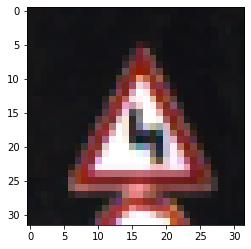

In [ ]:
plt.imshow(test['features'][80])